In [1]:
import astropy
from astropy.io import fits
print(astropy.__version__)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#******************************************************
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Times']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#*******************************************************
%matplotlib notebook

2.0.1


# I Reading data

## I.1 TT angular power spectrum (CLASS)

In [2]:
# CMB+BAO+SN-- definite results from thesis------------------------------------------------------------

#N=1 Nierika
pk1=np.loadtxt('../N1_nearika/output/N1_final/cmb_bao_sn/nrk_19_3_6_pk.dat')
cl1=np.loadtxt('../N1_nearika/output/N1_final/cmb_bao_sn/nrk_19_3_6_cl.dat')

#N=2 Nakawe
pk2=np.loadtxt('../N2_nakawe/output/N2_final/cmb_bao_sn/nkw_19-8-1_pk.dat')
cl2=np.loadtxt('../N2_nakawe/output/N2_final/cmb_bao_sn/nkw_19-8-1_cl.dat')

#N=3 Wimari
pk3=np.loadtxt('../N3_wimari/output/N3_final/cmb_bao_sn/wmr_19-8-5_pk.dat')
cl3=np.loadtxt('../N3_wimari/output/N3_final/cmb_bao_sn/wmr_19-8-5_cl.dat')

#LCDM
lpk=np.loadtxt('../cpl/output/lcdm_final/cmb_bao_sn/lcdm_19-6-25_pk.dat')
lcl=np.loadtxt('../cpl/output/lcdm_final/cmb_bao_sn/lcdm_19-6-25_cl.dat')

# BAO+SN-- definite results from thesis------------------------------------------------------------

#N=1 Nierika
pk12=np.loadtxt('../N1_nearika/output/N1_final/bao_sn/nrk_19-3-1_pk.dat')
cl12=np.loadtxt('../N1_nearika/output/N1_final/bao_sn/nrk_19-3-1_cl.dat')

#N=2 Nakawe
pk22=np.loadtxt('../N2_nakawe/output/N2_final/bao_sn/nkw_19-2-27_pk.dat')
cl22=np.loadtxt('../N2_nakawe/output/N2_final/bao_sn/nkw_19-2-27_cl.dat')



#LCDM
lpk2=np.loadtxt('../cpl/output/lcdm_final/bao_sn/lcdm_19-6-21_pk.dat')
lcl2=np.loadtxt('../cpl/output/lcdm_final/bao_sn/lcdm_19-6-21_cl.dat')

#CPL
pkcpl=np.loadtxt('../cpl/output/cpl_final/bao_sn/cpl_19-4-1_pk.dat')
clcpl=np.loadtxt('../cpl/output/cpl_final/bao_sn/cpl_19-4-1_cl.dat')

#BA
pkba=np.loadtxt('../barboza-alcaniz/output/BA_final/bao_sn/ba_19-8-1_pk.dat')
clba=np.loadtxt('../barboza-alcaniz/output/BA_final/bao_sn/ba_19-8-1_cl.dat')

## I.2 TT Planck 2015 

In [3]:
hdulist = fits.open('./../../../30_data/COM_PowerSpect_CMB_R2.02.fits')

In [4]:
dataTThighl=hdulist[8].data
dataTTlowl=hdulist[1].data

In [5]:
TThighl_2015=[]
for i in dataTThighl:
    TThighl_2015.append(i)
    
TTlowl_2015=[]
for j in dataTTlowl:
    TTlowl_2015.append(j)

In [6]:
TThl=[0,0,0]
vector=[]


for i in TThighl_2015:
    ELL=i[0]
    D_ELL=i[1]
    ERR=i[2]
    vector.append(ELL)
    vector.append(D_ELL)
    vector.append(ERR)
    TThl=np.vstack((TThl,vector))
    vector=[]
    
    
TTll=[0,0,0]
vector=[]


for j in TTlowl_2015:
    ELL=j[0]
    D_ELL=j[1]
    ERR=j[2]
    vector.append(ELL)
    vector.append(D_ELL)
    vector.append(ERR)
    TTll=np.vstack((TTll,vector))
    vector=[]

In [7]:
TThighl_lowl=np.vstack((TTll,TThl))

## I.3 TT Planck 2018

In [8]:
planck2018=np.loadtxt('../../../30_data/COM_PowerSpect_CMB-TT-full_R3.01.txt')
planck2015=np.loadtxt('../../../30_data/COM_PowerSpect_CMB-TT-hiL-binned_R2.02.txt', skiprows=3)

# II Plotting

<IPython.core.display.Javascript object>


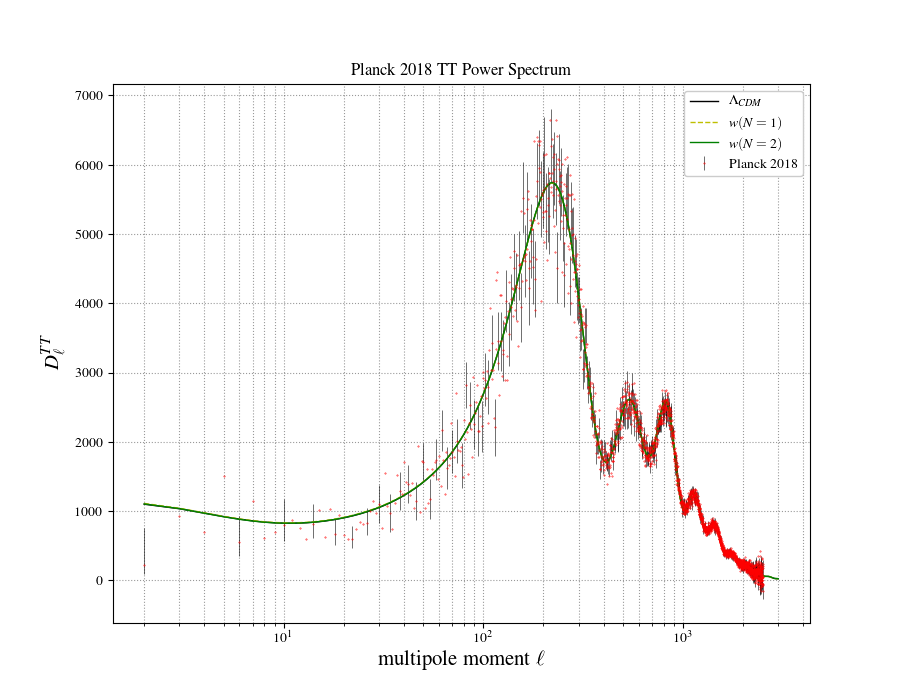

In [9]:
fig, ax = plt.subplots(figsize=(9,7))

# Rescaling Planck power-spectrum
x18=planck2018[:,0]
y18=planck2018[:,1]
err118=planck2018[:,2]
err218=planck2018[:,3]

x15=planck2015[:,0]
y15=planck2015[:,3]
err15=planck2015[:,4]

#------------------------------------------------------------------------------------


ax.errorbar(x18,y18,yerr=[err118,err218],fmt='r.',ecolor='k',elinewidth=0.4,alpha=1,errorevery=4,
            markersize=0.7,label=r'Planck 2018')
ax.plot(lcl[:,0],lcl[:,1],'k',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=1)
ax.plot(cl1[:,0],cl1[:,1],'--y',label=r'$w(N=1)$',alpha=1,linewidth=1)
ax.plot(cl2[:,0],cl2[:,1],'-g',label=r'$w(N=2)$',alpha=1,linewidth=1)

#--------------------------------------------------------------------------------------
ax.set_xscale("log")
#ax.set_yscale("log")

ax.set_title(r'Planck 2018 TT Power Spectrum')
#ax.set_xlim(left=2, right=3000)
ax.set_xlabel(r'multipole moment $\ell$',fontsize=15)
ax.set_ylabel(r'$D_{\ell}^{TT} $',fontsize=15)
ax.legend(loc='upper right', fancybox=True, framealpha=1)
ax.grid(which='both',ls=":", c='black', alpha=0.4);
#--------------------------------------------------------------------------------------

# CAMBIAR NOMBRE AQUIIIIIIIIIIIIIII
#plt.savefig('tt_N1_lcdm.pdf')

<IPython.core.display.Javascript object>


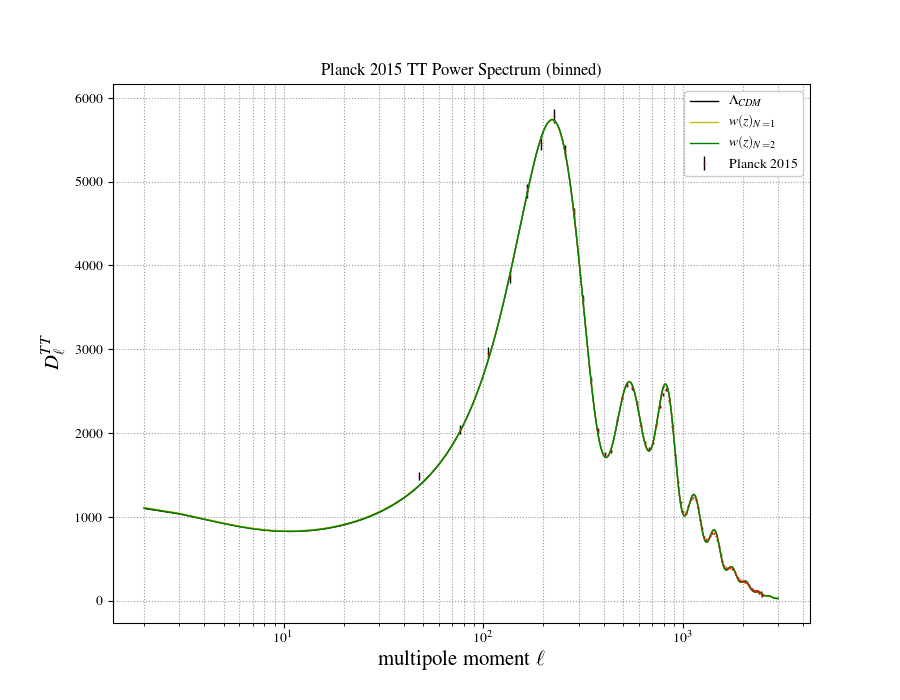

In [11]:
fig, ax = plt.subplots(figsize=(9,7))


ax.errorbar(x15,y15,yerr=err15,fmt='r.',ecolor='k',elinewidth=1,alpha=1,errorevery=1,
            markersize=0.7,label=r'Planck 2015')
ax.plot(lcl[:,0],lcl[:,1],'k',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=1)
ax.plot(cl1[:,0],cl1[:,1],'-y',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
ax.plot(cl2[:,0],cl2[:,1],'-g',label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)

#--------------------------------------------------------------------------------------
ax.set_xscale("log")
#ax.set_yscale("log")

ax.set_title(r'Planck 2015 TT Power Spectrum (binned)')
#ax.set_xlim(left=2, right=3000)
ax.set_xlabel(r'multipole moment $\ell$',fontsize=15)
ax.set_ylabel(r'$D_{\ell}^{TT} $',fontsize=15)
ax.legend(loc='upper right', fancybox=True, framealpha=1)
ax.grid(which='both',ls=":", c='black', alpha=0.4);
#--------------------------------------------------------------------------------------

# CAMBIAR NOMBRE AQUIIIIIIIIIIIIIII
#plt.savefig('tt_N1_lcdm.pdf')

<IPython.core.display.Javascript object>


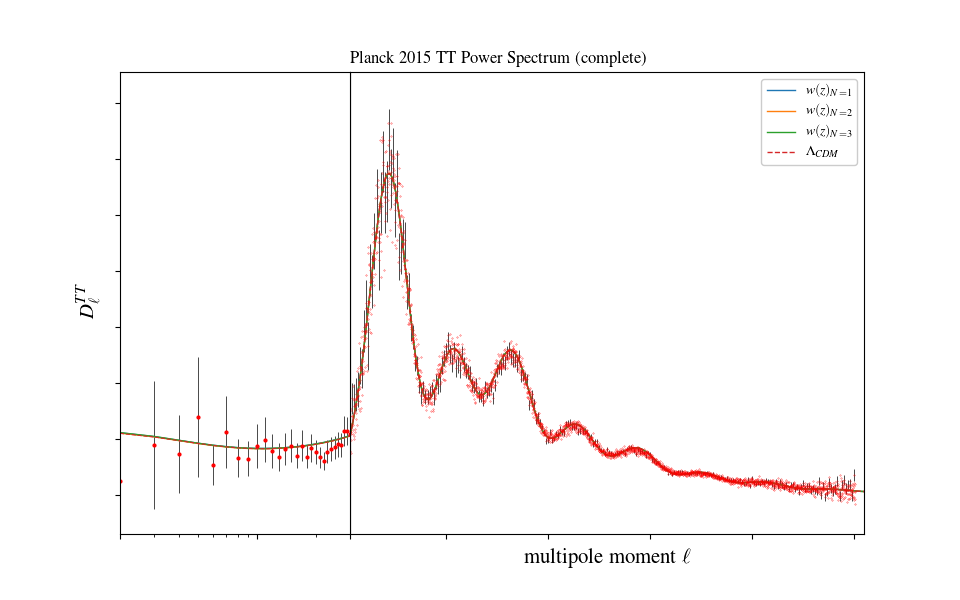

In [15]:
x=TThighl_lowl[:,0]
y=TThighl_lowl[:,1]
err=TThighl_lowl[:,2]

fig, ax = plt.subplots(figsize=(9.6,6))

#colors = plt.cm.viridis(np.linspace(0,1,4))
#plt.gca().set_color_cycle(colors)

#---------------------------------------------------------------------------------------------
linearAxis=ax


linearAxis.errorbar(x,y,yerr=err,fmt='r.',ecolor='k',elinewidth=0.5,alpha=1,errorevery=10,markersize=0.5)
linearAxis.plot(cl1[:,0],cl1[:,1],'-',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
linearAxis.plot(cl2[:,0],cl2[:,1],'-',label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)
linearAxis.plot(cl3[:,0],cl3[:,1],'-',label=r'$w(z)_{N=3}$',alpha=1,linewidth=1)
linearAxis.plot(lcl[:,0],lcl[:,1],'--',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=1)

linearAxis.set_title(r'Planck 2015 TT Power Spectrum (complete)',loc='left')
linearAxis.set_xlabel(r'multipole moment $\ell$',fontsize=15)
linearAxis.set_ylabel(r'$D_{\ell}^{TT} $',fontsize=15)
linearAxis.legend(loc='upper right', fancybox=True, framealpha=1)
#linearAxis.grid(which='major',ls=":", c='black', alpha=0.4);
#linearAxis.set_xscale("log")
#linearAxis.set_yscale("log")
linearAxis.set_xlim((30, 2550))
#---------------------------------------------------------------------------------------------

divider = make_axes_locatable(linearAxis)
logAxis = divider.append_axes("left", size=2.3, pad=0, sharey=linearAxis)
logAxis.set_xscale('log')
logAxis.set_xlim((2, 30));

logAxis.errorbar(x,y,yerr=err,fmt='ro',ecolor='k',elinewidth=0.5,alpha=1,errorevery=1,markersize=2)
logAxis.plot(cl1[:,0],cl1[:,1],'-',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
logAxis.plot(cl2[:,0],cl2[:,1],'-',label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)
logAxis.plot(cl3[:,0],cl3[:,1],'-',label=r'$w(z)_{N=3}$',alpha=1,linewidth=1)
logAxis.plot(lcl[:,0],lcl[:,1],'--',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=0.8)


logAxis.set_ylabel(r'$D_{\ell}^{TT} $',fontsize=15)
#logAxis.grid(which='major',ls=":", c='black', alpha=0.4);

#plt.title(r'Planck 2015 TT Power Spectrum', loc='right')
plt.xticks([2,10,30],["2","10","30"])
#plt.xlabel(r'multipole moment $\ell$',fontsize=15)
#plt.ylabel(r'$D_{\ell}^{TT} $',fontsize=15)
#plt.yticks()
plt.savefig('planck_2015_Dl.pdf')


#source of this: https://towardsdatascience.com/mixed-plot-scales-and-custom-violinboxplot-68cc8c5d6ead

In [16]:
cl1div=(cl1[:,1]-lcl[:,1])*100/lcl[:,1]
cl2div=(cl2[:,1]-lcl[:,1])*100/lcl[:,1]
cl3div=(cl3[:,1]-lcl[:,1])*100/lcl[:,1]
lcldiv=(lcl[:,1]-lcl[:,1])*100/lcl[:,1]
planck18div=(y18-lcl[0:2507,1])*100/lcl[0:2507,1]

planck15div=(y[:]-lcl[:2509,1])*100/lcl[:2509,1]

In [17]:
print len(lcl)
print len(y18)
print len(y)

2999
2507
2509


<IPython.core.display.Javascript object>


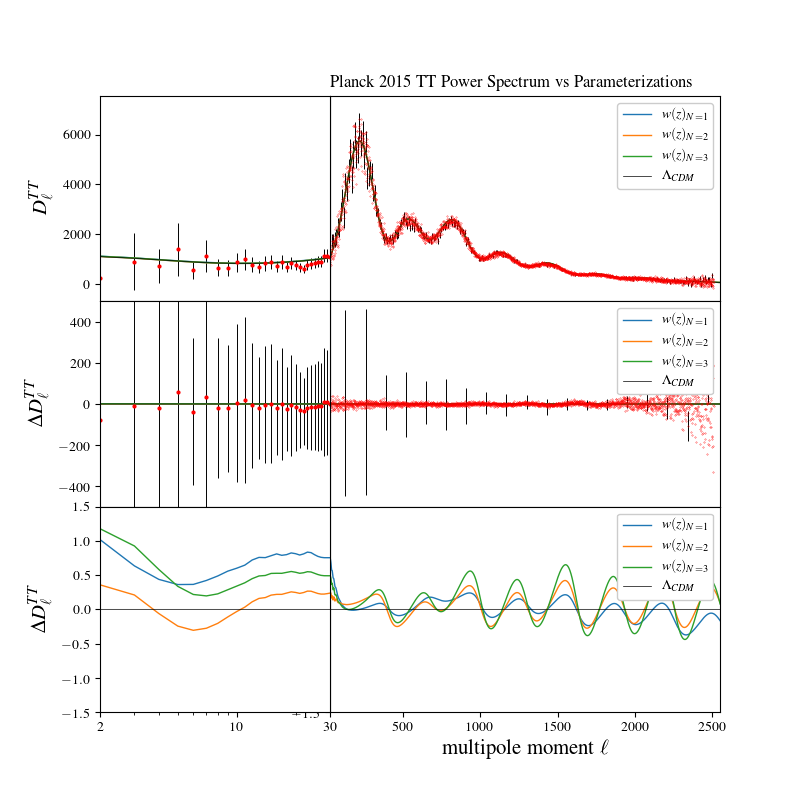

In [47]:
nombre='N1_N2_planck2015_comparison'

fig = plt.figure(figsize=(8, 8))
gs = plt.GridSpec(3, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])

#--------------------------------------------------------------------------------------
#------------------ models N=1 N=2 N=3 and LCDM vs Planck 2015 results ----------
linearAxis1=ax1

linearAxis1.errorbar(x,y,yerr=err,fmt='r.',ecolor='k',elinewidth=0.7,alpha=1,errorevery=10,markersize=0.5)
linearAxis1.plot(cl1[:,0],cl1[:,1],'-',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
linearAxis1.plot(cl2[:,0],cl2[:,1],'-',label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)
linearAxis1.plot(cl3[:,0],cl3[:,1],'-',label=r'$w(z)_{N=3}$',alpha=1,linewidth=1)
linearAxis1.plot(lcl[:,0],lcl[:,1],'-k',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=0.5)

#settings----------------------------------------------------------
linearAxis1.set_title(r'Planck 2015 TT Power Spectrum vs Parameterizations',loc='left')
linearAxis1.set_ylabel(r'$D_{\ell}^{TT} $',fontsize=15)
linearAxis1.legend(loc='upper right', fancybox=True, framealpha=1)
linearAxis1.set_xlim((30, 2550))
linearAxis1.set_xticklabels([])
#------------------------------------------------------------------

divider1 = make_axes_locatable(linearAxis1)
logAxis1 = divider1.append_axes("left", size=2.3, pad=0, sharey=linearAxis1)
logAxis1.set_xscale('log')
logAxis1.set_xlim((2, 30));

#settings----------------------------------------------------------
logAxis1.errorbar(x,y,yerr=err,fmt='ro',ecolor='k',elinewidth=0.7,alpha=1,errorevery=1,markersize=2)
logAxis1.plot(cl1[:,0],cl1[:,1],'-',alpha=1,linewidth=1.2)
logAxis1.plot(cl2[:,0],cl2[:,1],'-',alpha=1,linewidth=1)
logAxis1.plot(cl3[:,0],cl3[:,1],'-',alpha=1,linewidth=1)
logAxis1.plot(lcl[:,0],lcl[:,1],'-k',alpha=1,linewidth=0.5)
logAxis1.set_ylabel(r'$D_{\ell}^{TT} $',fontsize=15)
#------------------------------------------------------------------

#logAxis1.set_ylabel(r'$D_{\ell}^{TT} [\mu K^2]$',fontsize=15)
linearAxis1.legend(loc='upper right', fancybox=True, framealpha=1)

#--------------------------------------------------------------------------------------
#------------------ deviation from LCDM with errors enhanced -------------------------
linearAxis2=ax2

linearAxis2.errorbar(x,planck15div,yerr=err,fmt='r.',ecolor='k',elinewidth=0.7,alpha=1,errorevery=130,markersize=0.5)
linearAxis2.plot(cl1[:,0],cl1div,'-',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
linearAxis2.plot(cl2[:,0],cl2div,'-',label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)
linearAxis2.plot(cl3[:,0],cl3div,'-',label=r'$w(z)_{N=3}$',alpha=1,linewidth=1)
linearAxis2.plot(lcl[:,0],lcldiv,'-k',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=0.5)
linearAxis2.legend(loc='upper right', fancybox=True, framealpha=1)
linearAxis2.set_xlim((30, 2550))
linearAxis2.set_xticklabels([])
#linearAxis2.set_yticklabels([])

divider2 = make_axes_locatable(linearAxis2)
logAxis2 = divider2.append_axes("left", size=2.3, pad=0, sharey=linearAxis2)
logAxis2.set_xscale('log')
logAxis2.set_xlim((2, 30));
logAxis2.set_ylim(top=500,bottom=-500)


logAxis2.errorbar(x,planck15div,yerr=err,fmt='ro',ecolor='k',elinewidth=0.7,alpha=1,errorevery=1,markersize=2)
logAxis2.plot(cl1[:,0],cl1div,'-',alpha=1,linewidth=1)
logAxis2.plot(cl2[:,0],cl2div,'-',alpha=1,linewidth=1)
logAxis2.plot(cl3[:,0],cl3div,'-',alpha=1,linewidth=1)
logAxis2.plot(lcl[:,0],lcldiv,'-k',alpha=1,linewidth=0.5)
logAxis2.set_ylabel(r'$D_{\ell}^{TT} $',fontsize=15)

logAxis2.set_ylabel(r'$\Delta D_{\ell}^{TT}$',fontsize=15)
linearAxis2.legend(loc='upper right', fancybox=True, framealpha=1)


#--------------------------------------------------------------------------------------
#------------------ deviation from LCDM with details enhanced -------------------------
linearAxis3=ax3

linearAxis3.plot(cl1[:,0],cl1div,'-',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
linearAxis3.plot(cl2[:,0],cl2div,'-',label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)
linearAxis3.plot(cl3[:,0],cl3div,'-',label=r'$w(z)_{N=3}$',alpha=1,linewidth=1)
linearAxis3.plot(lcl[:,0],lcldiv,'-k',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=0.5)

linearAxis3.set_xlabel(r'multipole moment $\ell$',fontsize=15)
linearAxis3.legend(loc='upper right', fancybox=True, framealpha=1)
linearAxis3.set_xlim((30, 2550))
#linearAxis3.set_yticklabels([])

divider3 = make_axes_locatable(linearAxis3)
logAxis3 = divider3.append_axes("left", size=2.3, pad=0, sharey=linearAxis3)
logAxis3.set_xscale('log')
logAxis3.set_xlim((2, 30));

logAxis3.plot(cl1[:,0],cl1div,'-',alpha=1,linewidth=1)
logAxis3.plot(cl2[:,0],cl2div,'-',alpha=1,linewidth=1)
logAxis3.plot(cl3[:,0],cl3div,'-',alpha=1,linewidth=1)
logAxis3.plot(lcl[:,0],lcldiv,'-k',alpha=1,linewidth=0.5)
logAxis3.set_ylabel(r'$D_{\ell}^{TT} $',fontsize=15)

#logAxis3.xaxis.set_minor_locator(AutoMinorLocator())
#logAxis3.yaxis.set_minor_locator(AutoMinorLocator())
#logAxis3.tick_params(which='minor', length=2, color='k')

logAxis3.set_ylabel(r'$\Delta D_{\ell}^{TT}$',fontsize=15)
linearAxis3.legend(loc='upper right', fancybox=True, framealpha=1)
logAxis3.set_ylim(top=1.5,bottom=-1.5)
#-------------------------------------------------------------------------------------


plt.xticks([2,10,30],["2","10","30"])
#fig.tight_layout( h_pad=-1)
fig.subplots_adjust(hspace=0.00001)
plt.savefig('{0}.pdf'.format(nombre),transparent=False)

In [16]:
#DO NOT PLOT, con la gráfica de arriba basta
""""
fig = plt.figure(figsize=(8, 8))
gs = plt.GridSpec(4, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])

#--------------------------------------------------------------------------------------
#------------------ models N=1 N=2 and LCDM   vs  Planck 2015 binned results ----------
ax1.errorbar(x15,y15,yerr=err15,fmt='r.',ecolor='k',elinewidth=0.4,alpha=0.8,errorevery=1,
            markersize=2.5, markeredgecolor='k', markeredgewidth=0.08, label=r'Planck 2015 (binned)')
ax1.plot(cl1[:,0],cl1[:,1],'--y',label=r'$w(N=1)$',alpha=1,linewidth=1.2)
ax1.plot(cl2[:,0],cl2[:,1],'-g',label=r'$w(N=2)$',alpha=0.6,linewidth=0.6)
ax1.plot(lcl[:,0],lcl[:,1],'k',label=r'$\Lambda_{CDM}$',alpha=0.8,linewidth=0.3)

#--------------------------------------------------------------------------------------
#------------------ models N=1 N=2 and LCDM   vs  Planck 2018 binned results ----------
ax2.errorbar(x18,y18,yerr=[err118,err218],fmt='r.',ecolor='k',elinewidth=0.4,alpha=0.8, errorevery=10,
            markersize=2.5, markeredgecolor='k', markeredgewidth=0.08, markevery=10, label=r'Planck 2018')
ax2.plot(cl1[:,0],cl1[:,1],'--y',label=r'$w(N=1)$',alpha=1,linewidth=1.2)
ax2.plot(cl2[:,0],cl2[:,1],'-g',label=r'$w(N=2)$',alpha=0.6,linewidth=0.6)
ax2.plot(lcl[:,0],lcl[:,1],'k',label=r'$\Lambda_{CDM}$',alpha=0.8,linewidth=0.3)

#--------------------------------------------------------------------------------------
#------------------ deviation from LCDM with details enhanced -------------------------
ax3.errorbar(x18,planckdiv,yerr=[err118,err218],fmt='r.',ecolor='k',elinewidth=0.4,alpha=1,errorevery=130,
            markersize=2.5, markeredgecolor='k', markeredgewidth=0.08, markevery=130, label=r'Planck 2018')
ax3.plot(cl1[:,0],cl1div,'--y',label=r'$w(N=1)$',alpha=1,linewidth=1.2)
ax3.plot(cl2[:,0],cl2div,'-g',label=r'$w(N=2)$',alpha=0.6,linewidth=1)
ax3.plot(lcl[:,0],lcldiv,'k',label=r'$\Lambda_{CDM}$',alpha=0.8,linewidth=0.8)

#--------------------------------------------------------------------------------------
#------------------ deviation from LCDM with errors enhanced --------------------------
ax4.errorbar(x18,planckdiv,yerr=[err118,err218],fmt='r.',ecolor='k',elinewidth=0.4,alpha=1,errorevery=10,
            markersize=2.5, markeredgecolor='k', markeredgewidth=0.08, markevery=10, label=r'Planck 2018')
ax4.plot(cl1[:,0],cl1div,'--y',label=r'$w(N=1)$',alpha=1,linewidth=1.2)
ax4.plot(cl2[:,0],cl2div,'-g',label=r'$w(N=2)$',alpha=0.6,linewidth=0.6)
ax4.plot(lcl[:,0],lcldiv,'k',label=r'$\Lambda_{CDM}$',alpha=0.8,linewidth=0.3)





#--------------------------------------------------------------------------------------
ax1.set_xscale('log')

ax1.set_title(r'Planck 2015 (binned) \& 2018 TT Power Spectrum')
#ax1.set_xlim(left=2, right=3000)
#ax1.set_xlabel(r'multipole moment $\ell$',fontsize=15)
ax1.set_ylabel(r'$D_{\ell}^{TT} [\mu K^2]$',fontsize=15)
ax1.legend(loc='upper left', fancybox=True, framealpha=1)
ax1.grid(which='both',ls=":", c='black', alpha=0.4);

#ax1.vlines(x=30,ymin=min(lcl[:,1]),ymax=max(lcl[:,1]),linestyles='dashed',alpha=0.5,linewidth=0.8)
#--------------------------------------------------------------------------------------
ax2.set_xscale("log")

#ax2.set_title(r'Planck 2018 TT Power Spectrum')
#ax2.set_xlabel(r'multipole moment $\ell$',fontsize=15)
ax2.set_ylabel(r'$D_{\ell}^{TT} [\mu K^2]$',fontsize=15)
ax2.legend(loc='upper left', fancybox=True, framealpha=1)
ax2.grid(which='both',ls=":", c='black', alpha=0.4);

#ax2.vlines(x=30,ymin=min(lcl[:,1]),ymax=max(lcl[:,1]),linestyles='dashed',alpha=0.5,linewidth=0.8)
#--------------------------------------------------------------------------------------
ax3.set_xscale("log")

#ax3.set_title(r'Planck $\Lambda_{CDM}$ vs BAO+JLA+Planck $w(N=1)$ and $w(N=2)$')
#ax3.set_xlabel(r'multipole moment $\ell$',fontsize=15)
ax3.set_ylabel(r'$\Delta D_{\ell}^{TT} $',fontsize=15)
ax3.legend(loc='upper center', fancybox=True, framealpha=1)
#ax3.grid(which='both',ls=":", c='black', alpha=0.4);

ax3.set_ylim(top=4.5,bottom=-1.5)
#--------------------------------------------------------------------------------------
ax4.set_xscale("log")

#ax3.set_title(r'Planck $\Lambda_{CDM}$ vs BAO+JLA+Planck $w(N=1)$ and $w(N=2)$')
ax4.set_xlabel(r'multipole moment $\ell$',fontsize=15)
ax4.set_ylabel(r'$\Delta D_{\ell}^{TT} $',fontsize=15)
ax4.legend(loc='upper center', fancybox=True, framealpha=1)
#ax4.grid(which='both',ls=":", c='black', alpha=0.4);

#ax3.set_ylim(top=1.05,bottom=0.98)
#--------------------------------------------------------------------------------------


fig.tight_layout()
fig.subplots_adjust(hspace=0.03)
plt.savefig('N1_N2_planck2015_2018_comparison.pdf',transparent=False)"""

'"\nfig = plt.figure(figsize=(8, 8))\ngs = plt.GridSpec(4, 1)\n\nax1 = fig.add_subplot(gs[0, 0])\nax2 = fig.add_subplot(gs[1, 0])\nax3 = fig.add_subplot(gs[2, 0])\nax4 = fig.add_subplot(gs[3, 0])\n\n#--------------------------------------------------------------------------------------\n#------------------ models N=1 N=2 and LCDM   vs  Planck 2015 binned results ----------\nax1.errorbar(x15,y15,yerr=err15,fmt=\'r.\',ecolor=\'k\',elinewidth=0.4,alpha=0.8,errorevery=1,\n            markersize=2.5, markeredgecolor=\'k\', markeredgewidth=0.08, label=r\'Planck 2015 (binned)\')\nax1.plot(cl1[:,0],cl1[:,1],\'--y\',label=r\'$w(N=1)$\',alpha=1,linewidth=1.2)\nax1.plot(cl2[:,0],cl2[:,1],\'-g\',label=r\'$w(N=2)$\',alpha=0.6,linewidth=0.6)\nax1.plot(lcl[:,0],lcl[:,1],\'k\',label=r\'$\\Lambda_{CDM}$\',alpha=0.8,linewidth=0.3)\n\n#--------------------------------------------------------------------------------------\n#------------------ models N=1 N=2 and LCDM   vs  Planck 2018 binned results ------

<IPython.core.display.Javascript object>


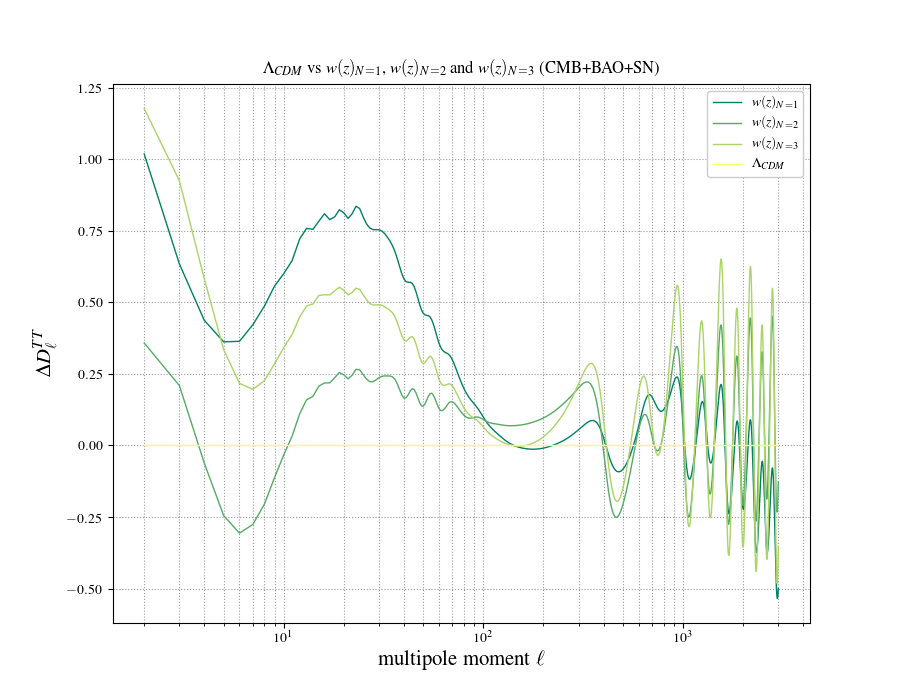

In [55]:
nombre='TT_residue_all_cmbbaosn'
fig, ax = plt.subplots(figsize=(9,7))

colors = plt.cm.summer(np.linspace(0,1,4))
plt.gca().set_color_cycle(colors)

#ax.errorbar(x18,y18/y18,yerr=[err118,err218],fmt='r.',ecolor='k',elinewidth=0.4,alpha=1,errorevery=10,
#            markersize=0.7,label=r'Planck 2018')

ax.plot(cl1[:,0],cl1div,label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
ax.plot(cl2[:,0],cl2div,label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)
ax.plot(cl3[:,0],cl3div,label=r'$w(z)_{N=3}$',alpha=1,linewidth=1)
ax.plot(lcl[:,0],lcldiv,label=r'$\Lambda_{CDM}$',alpha=1,linewidth=1)

#--------------------------------------------------------------------------------------
ax.set_title(r'$\Lambda_{CDM}$ vs $w(z)_{N=1}$, $w(z)_{N=2}$ and $w(z)_{N=3}$ (CMB+BAO+SN)')
#ax.set_xlim(left=2, right=3000)
#ax.set_ylim(top=100, bottom=-100)
ax.set_xlabel(r'multipole moment $\ell$',fontsize=15)
ax.set_ylabel(r'$\Delta D_{\ell}^{TT} $',fontsize=15)
ax.legend(loc='upper right', fancybox=True, framealpha=1)
ax.grid(which='both',ls=":", c='black', alpha=0.4);
ax.set_xscale('log')
#--------------------------------------------------------------------------------------

plt.savefig('{0}.pdf'.format(nombre),transparent=False)

<IPython.core.display.Javascript object>


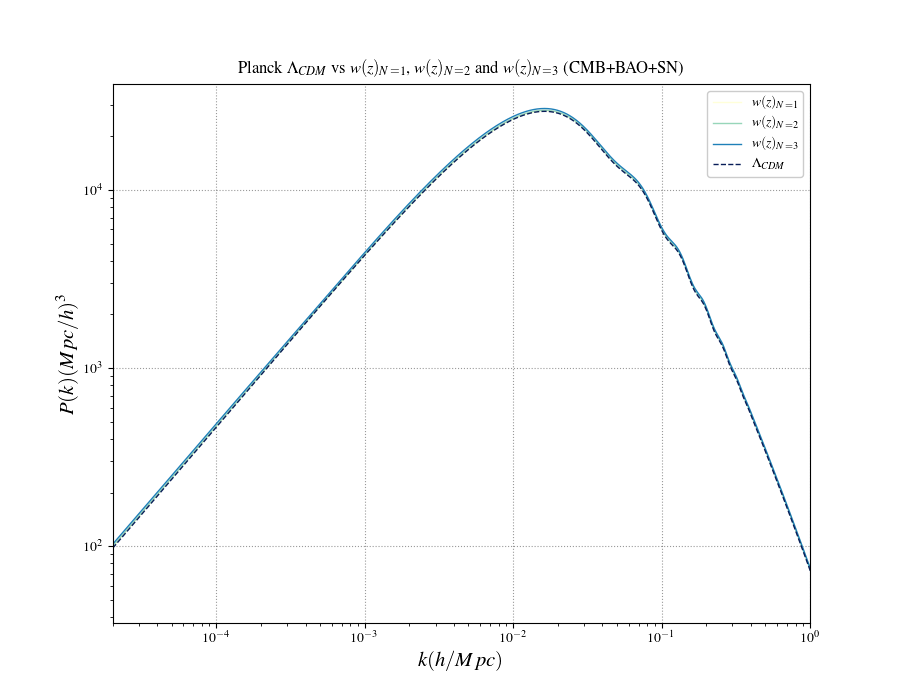

In [54]:
nombre='power_N_vs_lcdm'

fig, ax = plt.subplots(figsize=(9,7))

colors = plt.cm.YlGnBu(np.linspace(0,1,4))
plt.gca().set_color_cycle(colors)

#N=1,2,3 vs lcdm----------------------------------------------------------------------------
ax.plot(pk1[:,0],pk1[:,1],'-',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
ax.plot(pk2[:,0],pk2[:,1],'-',label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)
ax.plot(pk3[:,0],pk3[:,1],'-',label=r'$w(z)_{N=3}$',alpha=1,linewidth=1)
ax.plot(lpk[:,0],lpk[:,1],'--',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=1)


#--------------------------------------------------------------------------------------
ax.set_title(r'Planck $\Lambda_{CDM}$ vs $w(z)_{N=1}$, $w(z)_{N=2}$ and $w(z)_{N=3}$ (CMB+BAO+SN)')
ax.legend(loc='best', fancybox=True, framealpha=1)
ax.set_ylabel(r'$P(k) (Mpc/h)^3$',fontsize=15)
ax.set_xlabel(r'$k (h/Mpc) $',fontsize=15)
#ax.set_ylim(bottom=10**-5)
ax.set_xlim(left=2*10**-5,right=1)
ax.grid(which='major',ls=":", c='black',alpha=0.4)

ax.set_xscale('log')
ax.set_yscale('log')
#--------------------------------------------------------------------------------------

plt.savefig('{0}.pdf'.format(nombre),transparent=False)

In [50]:
pk1div=(pk1[:,1]-lpk[:,1])*100/lpk[:,1]
pk2div=(pk2[:,1]-lpk[:,1])*100/lpk[:,1]
pk3div=(pk3[:,1]-lpk[:,1])*100/lpk[:,1]
lpkdiv=(lpk[:,1]-lpk[:,1])*100/lpk[:,1]

<IPython.core.display.Javascript object>


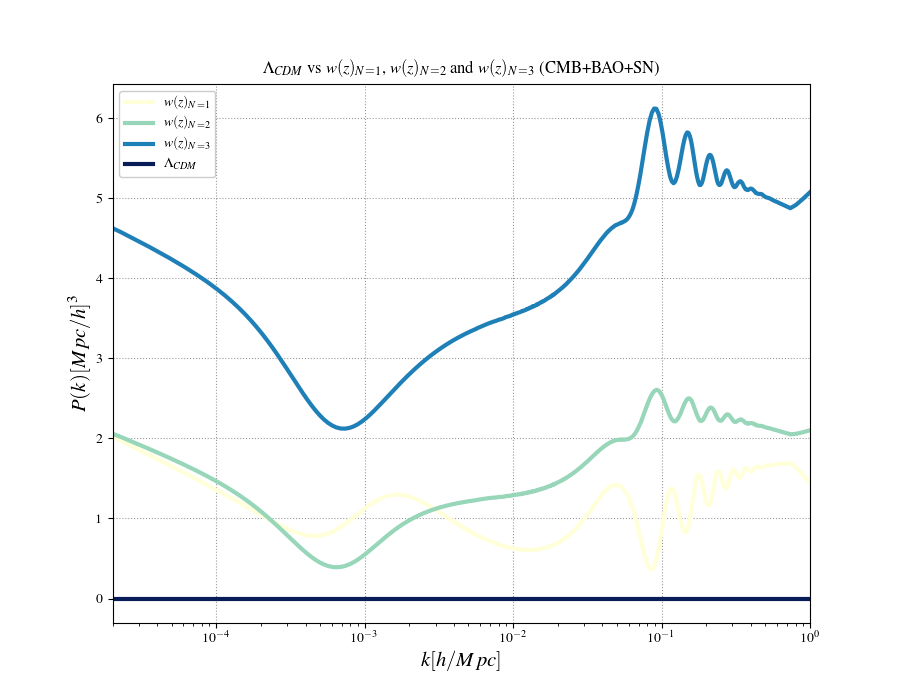

In [56]:
nombre='power_residue_N_vs_lcdm'
fig, ax = plt.subplots(figsize=(9,7))

colors = plt.cm.YlGnBu(np.linspace(0,1,4))
plt.gca().set_color_cycle(colors)

ax.plot(pk1[:,0],pk1div,'-',label=r'$w(z)_{N=1}$',alpha=1,linewidth=3)
ax.plot(pk2[:,0],pk2div,'-',label=r'$w(z)_{N=2}$',alpha=1,linewidth=3)
ax.plot(pk3[:,0],pk3div,'-',label=r'$w(z)_{N=3}$',alpha=1,linewidth=3)
ax.plot(lpk[:,0],lpkdiv,'-',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=3)

#--------------------------------------------------------------------------------------
ax.set_title(r'$\Lambda_{CDM}$ vs $w(z)_{N=1}$, $w(z)_{N=2}$ and $w(z)_{N=3}$ (CMB+BAO+SN)')
ax.legend(loc='best', fancybox=True, framealpha=1)
ax.set_ylabel(r'$P(k) [Mpc/h]^3$',fontsize=15)
ax.set_xlabel(r'$k [h/Mpc] $',fontsize=15)
#ax.set_ylim(bottom=10**-5)
ax.set_xlim(left=2*10**-5,right=1)
ax.grid(which='major',ls=":", c='black',alpha=0.4)
ax.set_xscale('log')
#ax.set_yscale('log')

#--------------------------------------------------------------------------------------


# CHANGE NAME HERE!!!!
plt.savefig('{0}.pdf'.format(nombre),transparent=False)

<IPython.core.display.Javascript object>


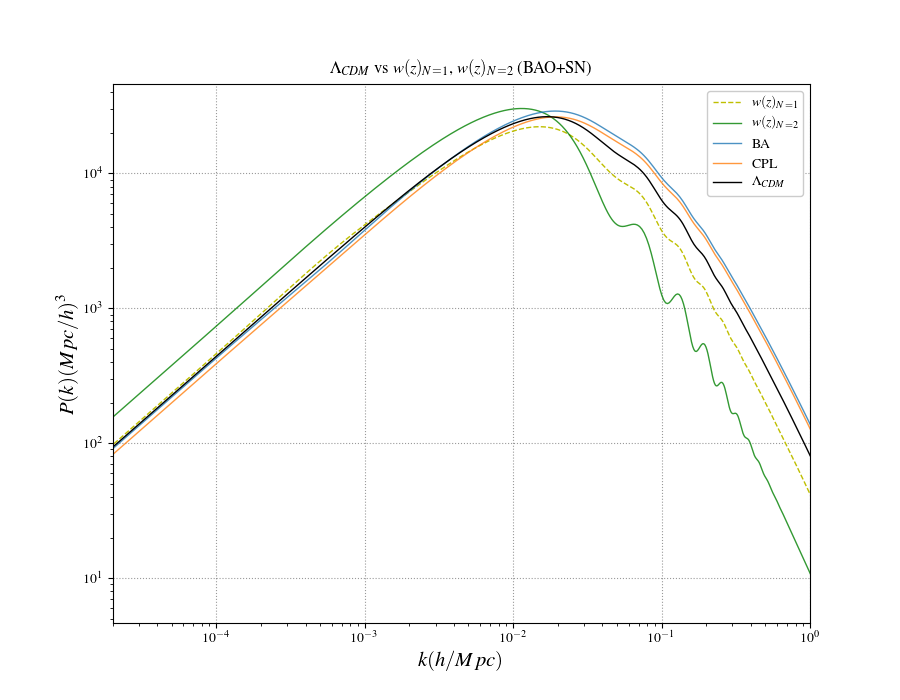

In [52]:
fig, ax = plt.subplots(figsize=(9,7))

#N=1 vs lcdm----------------------------------------------------------------------------
ax.plot(pk12[:,0],pk12[:,1],'--y',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
ax.plot(pk22[:,0],pk22[:,1],'-g',label=r'$w(z)_{N=2}$',alpha=0.8,linewidth=1)
ax.plot(pkba[:,0],pkba[:,1],label=r'BA',alpha=0.8,linewidth=1)
ax.plot(pkcpl[:,0],pkcpl[:,1],label=r'CPL',alpha=0.8,linewidth=1)
ax.plot(lpk2[:,0],lpk2[:,1],'k',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=1)

#--------------------------------------------------------------------------------------
ax.set_title(r'$\Lambda_{CDM}$ vs $w(z)_{N=1}$, $w(z)_{N=2}$ (BAO+SN)')
ax.legend(loc='best', fancybox=True, framealpha=1)
ax.set_ylabel(r'$P(k) (Mpc/h)^3$',fontsize=15)
ax.set_xlabel(r'$k (h/Mpc) $',fontsize=15)
#ax.set_ylim(bottom=10**-5)
ax.set_xlim(left=2*10**-5,right=1)
ax.grid(which='major',ls=":", c='black',alpha=0.4)

ax.set_xscale('log')
ax.set_yscale('log')
#--------------------------------------------------------------------------------------



In [27]:
pk12div=(pk12[:,1]-lpk2[:,1])*100/lpk2[:,1]
pk22div=(pk22[0:585,1]-lpk2[0:585,1])*100/lpk2[0:585,1]
pkbadiv=(pkba[0:605,1]-lpk2[:,1])*100/lpk2[:,1]
pkcpldiv=(pkcpl[0:605,1]-lpk2[:,1])*100/lpk2[:,1]
lpk2div=(lpk2[:,1]-lpk2[:,1])*100/lpk2[:,1]

<IPython.core.display.Javascript object>


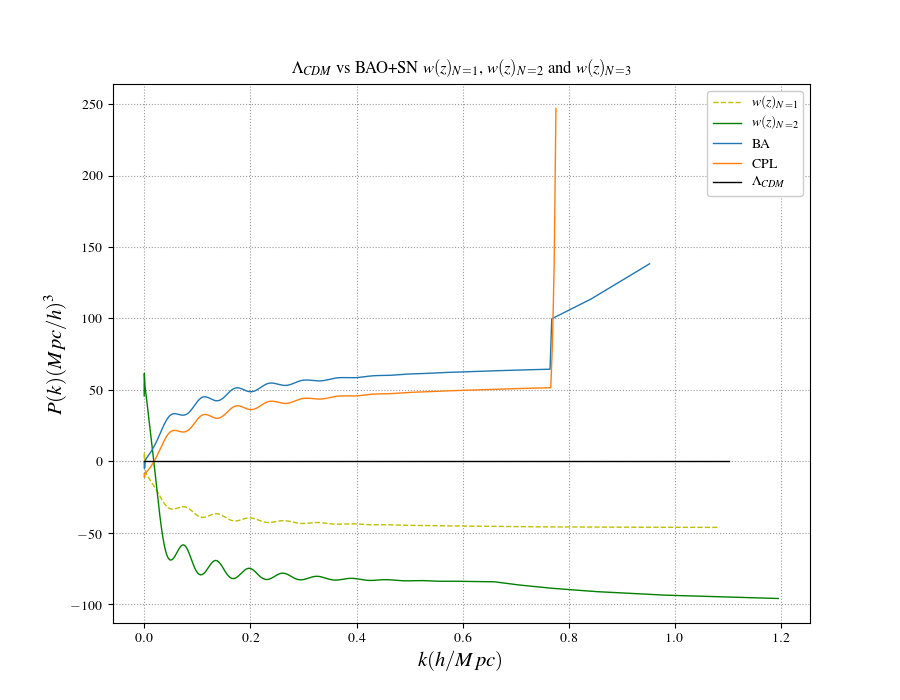

In [29]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(pk12[:,0],pk12div,'--y',label=r'$w(z)_{N=1}$',alpha=1,linewidth=1)
ax.plot(pk22[0:605,0],pk22div,'-g',label=r'$w(z)_{N=2}$',alpha=1,linewidth=1)
ax.plot(pkba[0:605,0],pkbadiv,label=r'BA',alpha=1,linewidth=1)
ax.plot(pkcpl[0:605,0],pkcpldiv,label=r'CPL',alpha=1,linewidth=1)
ax.plot(lpk2[:,0],lpk2div,'k',label=r'$\Lambda_{CDM}$',alpha=1,linewidth=1)

#--------------------------------------------------------------------------------------
ax.set_title(r'$\Lambda_{CDM}$ vs BAO+SN $w(z)_{N=1}$, $w(z)_{N=2}$ and $w(z)_{N=3}$')
ax.legend(loc='best', fancybox=True, framealpha=1)
ax.set_ylabel(r'$P(k) (Mpc/h)^3$',fontsize=15)
ax.set_xlabel(r'$k (h/Mpc) $',fontsize=15)
#ax.set_ylim(bottom=10**-5)
#ax.set_xlim(left=2*10**-5,right=1)
ax.grid(which='major',ls=":", c='black',alpha=0.4)
#ax.set_xscale('log')
#ax.set_yscale('log')

#--------------------------------------------------------------------------------------


# CHANGE NAME HERE!!!!
#plt.savefig('power_residue_N_vs_lcdm.pdf')